In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Unemployment in India.csv')

In [3]:
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
326,Uttar Pradesh,31-01-2020,Monthly,6.06,45777509.0,39.67,Rural
373,Andhra Pradesh,31-05-2019,Monthly,6.09,4788661.0,37.45,Urban
528,Jharkhand,29-02-2020,Monthly,19.67,2493023.0,45.42,Urban
491,Haryana,31-03-2020,Monthly,27.14,2275407.0,36.73,Urban
381,Andhra Pradesh,31-01-2020,Monthly,7.11,4618860.0,35.91,Urban


In [4]:
df2=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [5]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
print(df.dtypes)
df.columns=['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Area']


Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               740 non-null    object 
 1   Date                                 740 non-null    object 
 2   Frequency                            740 non-null    object 
 3   Estimated Unemployment Rate          740 non-null    float64
 4   Estimated Employed                   740 non-null    float64
 5   Estimated Labour Participation Rate  740 non-null    float64
 6   Area                                 740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [12]:
df['Date'].fillna(df['Date'].mode().iloc[0],inplace=True)
df['Frequency'].fillna(df['Frequency'].mode().iloc[0],inplace=True) 
df['States'].fillna(df['States'].mode().iloc[0],inplace=True)
df['Estimated Unemployment Rate'].fillna(df['Estimated Unemployment Rate'].mean(),inplace=True)
df['Estimated Employed'].fillna(df['Estimated Employed'].mean(),inplace=True)
df['Estimated Labour Participation Rate'].fillna(df['Estimated Labour Participation Rate'].mean(),inplace=True) 
df.drop(['Area'],axis=1,inplace=True)


In [13]:
df.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
dtype: int64

In [22]:
df2.columns=['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','Longitude','Latitude']

In [23]:
df2.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
Longitude                              0
Latitude                               0
dtype: int64

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   Longitude                            267 non-null    float64
 8   Latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [25]:
df2.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


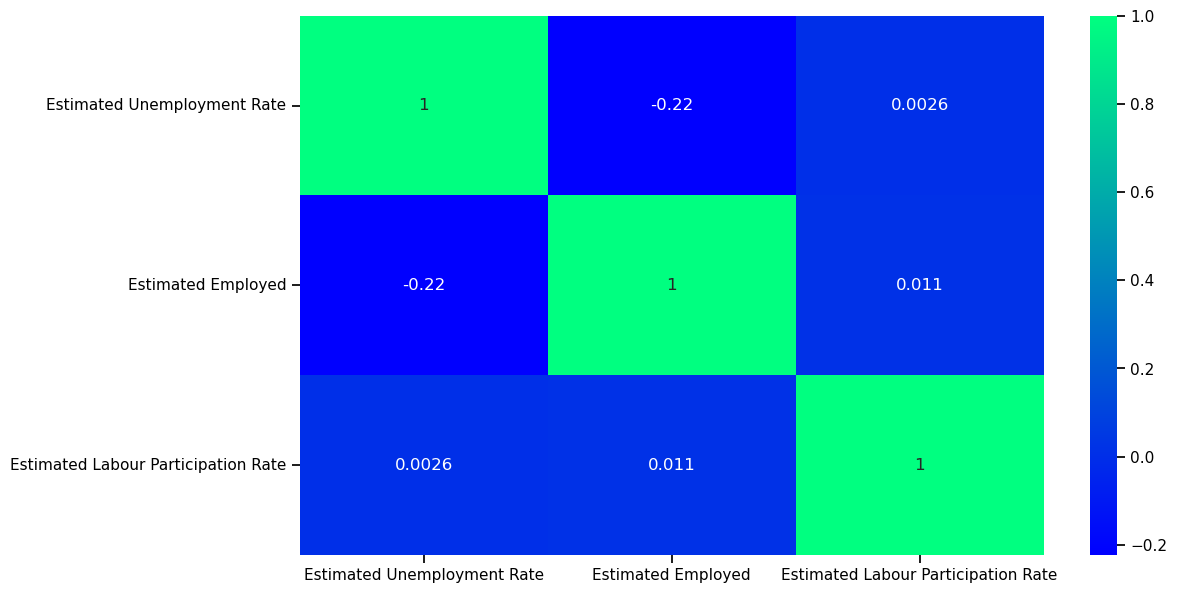

In [31]:
heat_maps = df[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]
heat_maps = heat_maps.corr()
plt.figure(figsize=(12,7))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps,annot=True,cmap='winter');

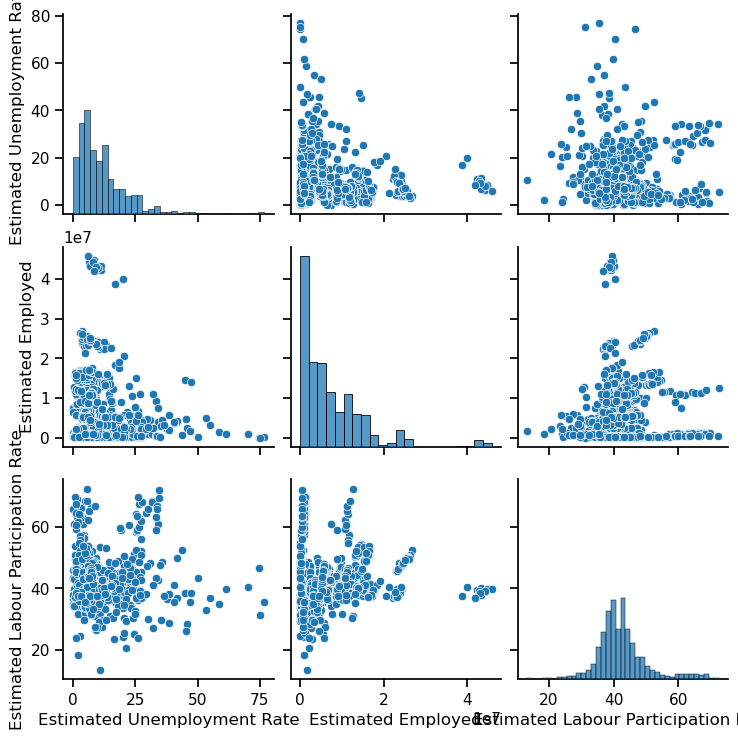

In [34]:
sns.pairplot(df)

In [47]:
df.States.value_counts()

Andhra Pradesh      56
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: States, dtype: int64

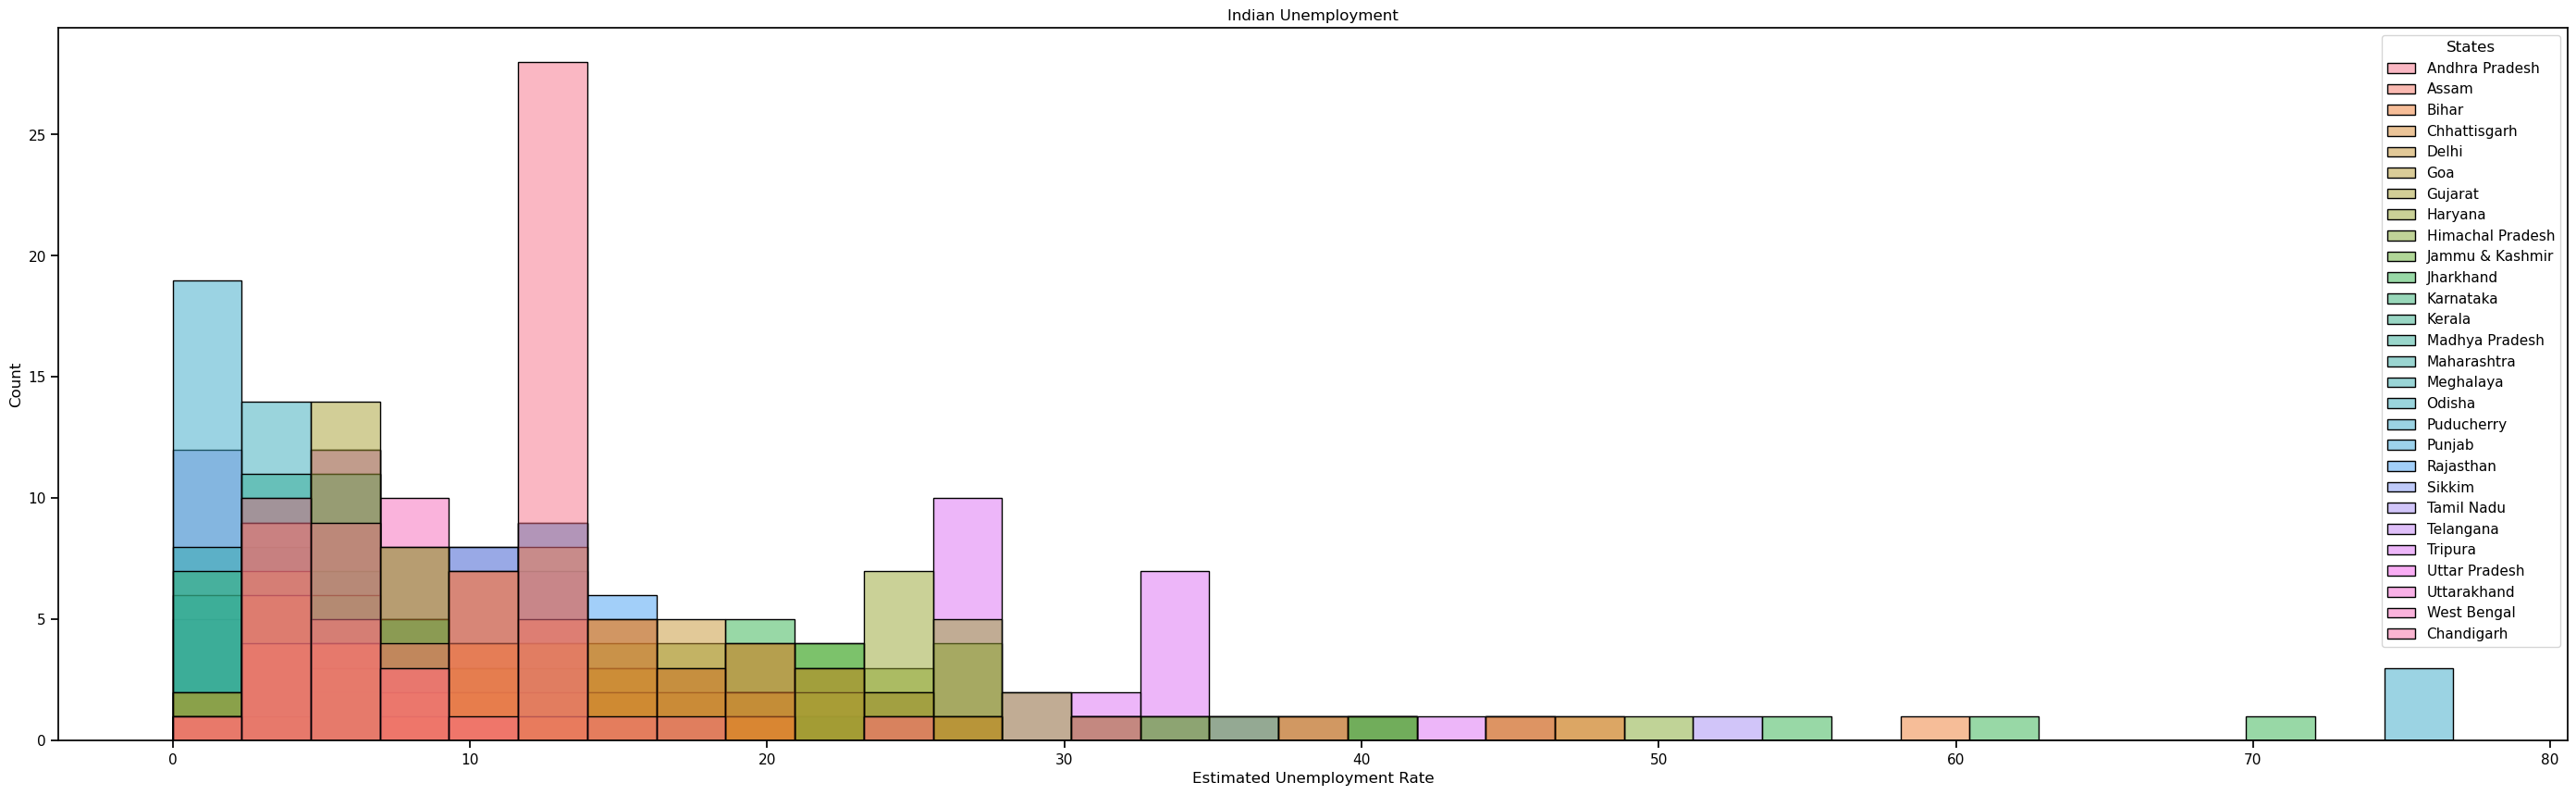

In [38]:
plt.figure(figsize=(35,10))
plt.title('Indian Unemployment')
sns.histplot(x="Estimated Unemployment Rate",hue="States",data=df) 
plt.show()


In [3]:
import plotly.express as px
fg=px.histogram(df,x='States',y='Estimated Unemployment Rate',title='Indian unemployment Rate')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()


NameError: name 'df' is not defined

In [41]:
df2.sample()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude
258,West Bengal,29-02-2020,M,4.92,36964178,47.74,East,22.9868,87.855


<Axes: >

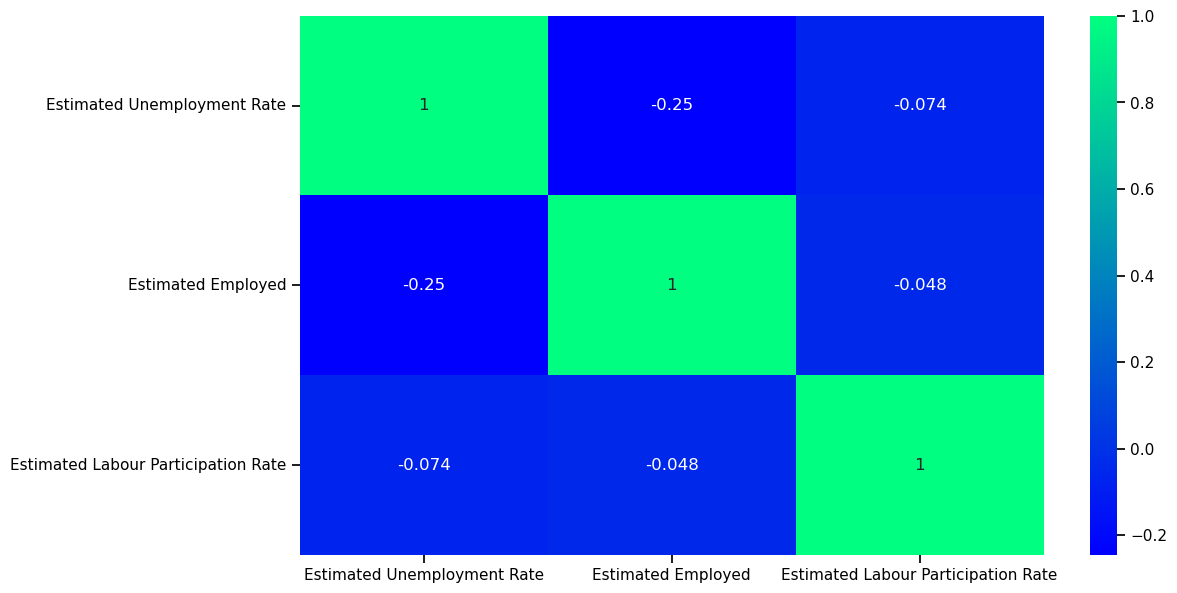

In [49]:
heat_maps = df2[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']] 

heat_maps = heat_maps.corr()

plt.figure(figsize=(12,7))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps,annot=True,cmap='winter')

In [50]:
df2.Region.value_counts()

North        79
South        60
West         50
East         40
Northeast    38
Name: Region, dtype: int64

In [4]:
States = df2.groupby(["States"])[['Estimated Unemployment Rate', "Estimated Employed", "Estimated Labour Participation Rate"]].mean()
States = pd.DataFrame(States).reset_index()

fig = px.bar(States, x="States", y="Estimated Employed", color="States", title="Average Employed Rate By Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()


NameError: name 'df2' is not defined

In [5]:
Region = df2.groupby(["Region"])[['Estimated Unemployment Rate', "Estimated Employed", "Estimated Labour Participation Rate"]].mean()
Region = pd.DataFrame(Region).reset_index()

fig = px.bar(Region, x="Region", y="Estimated Unemployment Rate", color="Region", title="Average Umemployment Rate")
fig.update_layout(xaxis={'categoryorder':'total descending'}) 

fig.show()


NameError: name 'df2' is not defined